In [2]:
!pip install geopandas matplotlib requests


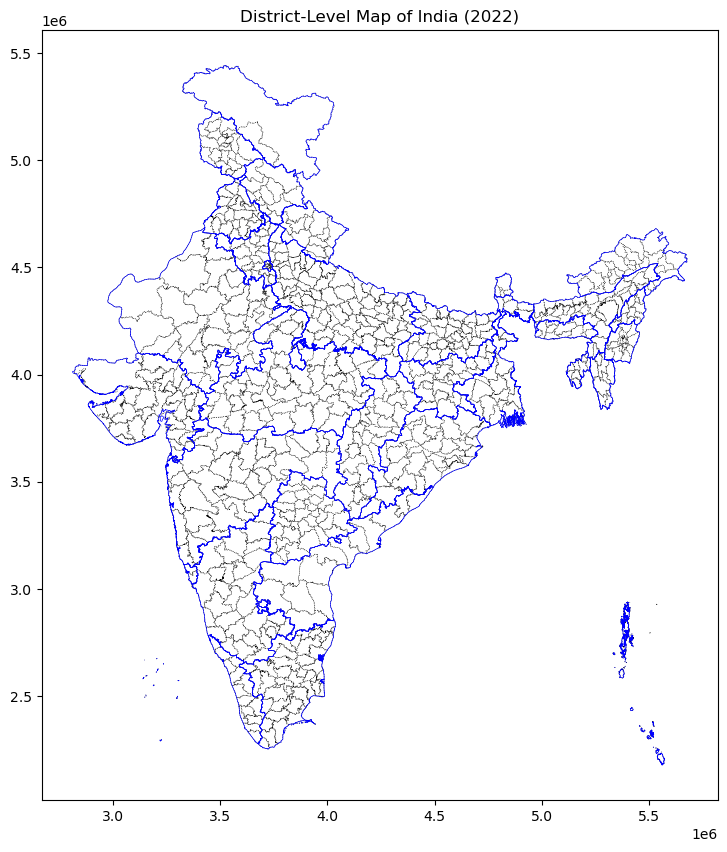

In [22]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Load the district-level shapefile
shapefile_path = 'DISTRICT_BOUNDARY.shp'  # Update with your extracted shapefile path
gdf = gpd.read_file(shapefile_path)

# Load the state-level shapefile
state_shapefile_path = 'Admin2.shp'  # Update with the correct path for state boundaries
state_gdf = gpd.read_file(state_shapefile_path)

# Check and define CRS for state_gdf if not set
if state_gdf.crs is None:
    # Set the CRS manually (update the EPSG code if necessary)
    state_gdf.crs = 'EPSG:4326'  # Assuming WGS 84, change if needed

# Ensure both shapefiles have the same CRS (reproject if necessary)
if gdf.crs != state_gdf.crs:
    state_gdf = state_gdf.to_crs(gdf.crs)  # Reproject state boundaries to match district CRS

# Plot the district map with custom styles
fig, ax = plt.subplots(figsize=(10, 10))

# Plot districts with pure white fill and dotted borders
gdf.plot(ax=ax, color='white', edgecolor='black', linestyle=':', linewidth=0.5)

# Plot state boundaries with red color and solid lines
state_gdf.plot(ax=ax, edgecolor='blue', linewidth=0.5, color='none')

# Set title
plt.title('District-Level Map of India (2022)')

# Display the map
plt.show()
